<a href="https://colab.research.google.com/github/gabrieldasneves/MachineLearnStudies/blob/main/classification_and_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

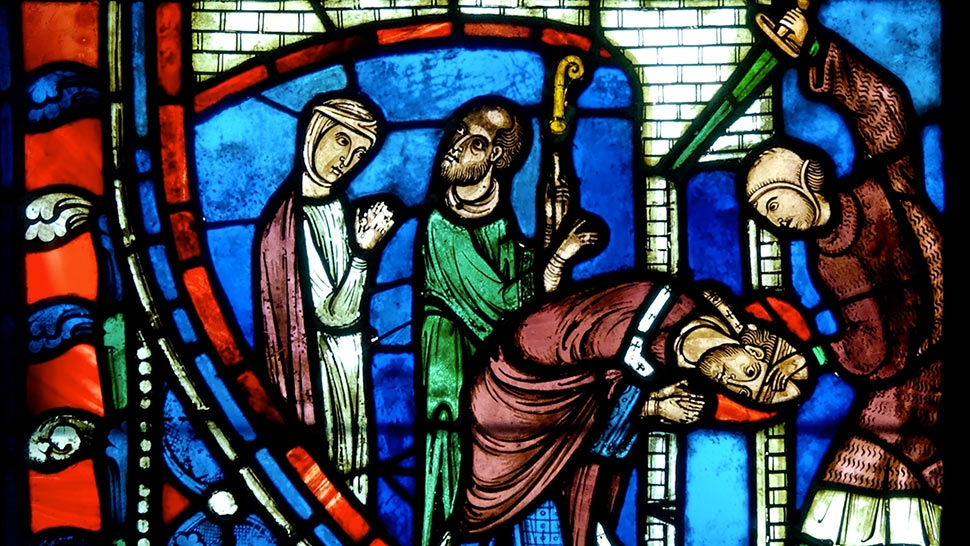

This project analyzes a data set of N = 214 observations of glass samples, in which nine predictors are considered. (the refractive index, the percentages of eight elements: Na, Mg, Al, Si, K, Ca, Ba and Fe. The corresponding class label, which represents seven types of glass, is also considered).

#Classification

##EDA & PCA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
# reading data with pandas
dataSet = pd.read_csv('/content/glass.csv')
# let's take a look...
print(len(dataSet))
dataSet.head()

214


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
print(np.mean(dataSet.Na))
print(np.mean(dataSet.Mg))
print(np.mean(dataSet.Al))
print(np.mean(dataSet.Si))
print(np.mean(dataSet.K))
print(np.mean(dataSet.Ca))
print(np.mean(dataSet.Ba))
print(np.mean(dataSet.Fe))


13.407850467289723
2.684532710280374
1.4449065420560752
72.65093457943925
0.49705607476635494
8.95696261682243
0.17504672897196263
0.057009345794392506


First, we will focus on the skewness, which is a very important information about a dataset, because when the data is unevenly distributed, it can harm the model's result. Most of the skewness of our predictors are values ​​close to
zero, which indicates that the predictor distribution is
approximately symmetrical. However, we can note that the skewness values ​​of K and Ba are very high compared to the others so it would be favorable to use some statistical method like Box and Cox to reduce these values.

In [4]:
print(scipy.stats.skew(dataSet.Ba))
print(scipy.stats.skew(dataSet.K))
print(scipy.stats.skew(dataSet.Na))
print(scipy.stats.skew(dataSet.Fe))
print(scipy.stats.skew(dataSet.Mg))
print(scipy.stats.skew(dataSet.Si))
print(scipy.stats.skew(dataSet.Ca))
print(scipy.stats.skew(dataSet.Al))

3.3924308894408455
6.505635834012888
0.4509917200116132
1.7420067617989543
-1.1444648495986702
-0.7253172664513229
2.0326773755262475
0.9009178781425268


The standard deviation of the values ​​are small so we can conclude that the data are concentrated in the same range of values, especially in the refractive index which has an almost zero deviation. This fact can be seen in your histogram that the range of values ​​goes from 1.510 to 1.530.

In [5]:
print(np.std(dataSet.Na))
print(np.std(dataSet.Mg))
print(np.std(dataSet.Al))
print(np.std(dataSet.Si))
print(np.std(dataSet.K))
print(np.std(dataSet.Ca))
print(np.std(dataSet.Ba))
print(np.std(dataSet.Fe))

0.8146933693428364
1.4390337868112202
0.498101761789083
0.7727339892550712
0.650666248509233
1.419824468716814
0.4960561730170948
0.09721077353922959


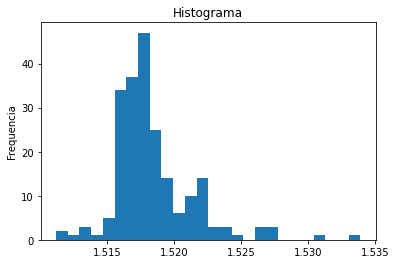

In [6]:
plt.hist(dataSet.RI,  bins='auto')
plt.title('Histograma')
plt.ylabel('Frequencia')
plt.show()

then did a conditional analysis of predictors with respect to glass types. There are some predictors that demonstrate a discriminative power, for example: Barium, Potassium and Iron do not have much influence on the refractive index of the samples. Other elements can help in the identification of some types of glass, such as Sodium (types 1, 3, 6 and 7).

[(0.0, 16.0)]

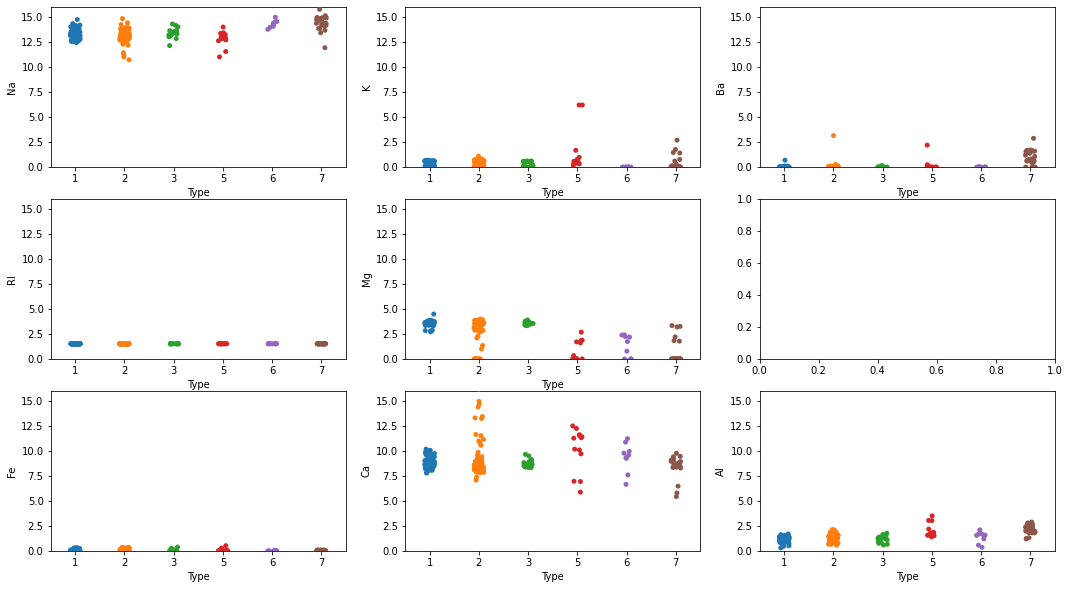

In [7]:
fig, axes = plt.subplots(3, 3, figsize=(18, 10))

sns.stripplot(ax=axes[0, 0],x='Type', y='Na', data=dataSet).set(ylim=(0, 16))
sns.stripplot(ax=axes[1, 0],x='Type', y='RI', data=dataSet).set(ylim=(0, 16))
sns.stripplot(ax=axes[1, 1],x='Type', y='Mg', data=dataSet).set(ylim=(0, 16))
sns.stripplot(ax=axes[0, 1],x='Type', y='K', data=dataSet).set(ylim=(0, 16))
sns.stripplot(ax=axes[0, 2],x='Type', y='Ba', data=dataSet).set(ylim=(0, 16))
sns.stripplot(ax=axes[2, 0],x='Type', y='Fe', data=dataSet).set(ylim=(0, 16))
sns.stripplot(ax=axes[2, 1],x='Type', y='Ca', data=dataSet).set(ylim=(0, 16))
sns.stripplot(ax=axes[2, 2],x='Type', y='Al', data=dataSet).set(ylim=(0, 16))



The pairwise graph of predictors and their correlation matrix are ways to analyze the correlation between predictors. This is an important pre-processing step, as predictors that are highly correlated if used together in the model, because they have very similar information, produce redundant information in the prediction. Thus, it may be even more advantageous to remove some of these predictors so as not to harm the model's results.

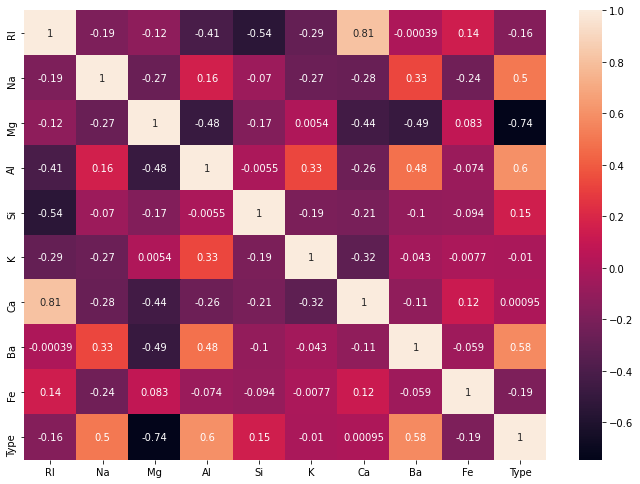

In [8]:
fig, ax = plt.subplots(figsize = (11.7, 8.27))

sns.heatmap(ax = ax, data=dataSet.corr(), annot=True)
px.scatter_matrix(dataSet,
    dimensions=["Na", "Ba", "Si", "Fe","RI","Al","Mg","K","Ca"],
    color="Type") 

We concluded that there are correlated predictors in our dataset and we need to minimize this so that when applying the model we have a good result and besides that if we use fewer predictors we can reduce the computational cost.



### PCA

Principal Component Analysis (PCA) is a technique used to reduce the size of our data. To choose the main components, which are going to be the new predictors, we need to transform our data on the same scale, so that none has a greater weight than the other in the data analysis. We use these scaled values ​​to make the PCA.

In [9]:
features = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
x = dataSet.loc[:, features].values
y = dataSet.loc[:,['Type']].values
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=0.99)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents)
finalPCA = pd.concat([principalDf, dataSet[['Type']]], axis = 1) ## PCAs Matrix

labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    principalComponents,
    labels=labels,
    dimensions=range(2),
    color=dataSet["Type"]
)
fig.update_traces(diagonal_visible=False)
fig.show()

The variance indicates how much information can be attributed to each of the principal components.

In [10]:
pca.explained_variance_ratio_

array([0.27901819, 0.2277858 , 0.15609378, 0.12865138, 0.10155581,
       0.05862613, 0.04099538])

## KNN

K Nearest Neighbor(KNN) is a very simple, easy to understand, versatile and one of the topmost machine learning algorithms. 

"The principle behind nearest neighbor methods is to find a predefined number of training samples closest in distance to the new point, and predict the label from these. The number of samples can be a user-defined constant (k-nearest neighbor learning), or vary based on the local density of points (radius-based neighbor learning). " ( [Reference](https://scikit-learn.org/stable/modules/neighbors.html))

In [11]:
y = dataSet[['Type']]

x = principalDf 

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state = 13 )


In [12]:
n_neighbors =1
clf = KNeighborsClassifier(n_neighbors=n_neighbors)
clf.fit(x_train,y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [13]:
y_pred = clf.predict(x_test)
y_pred

array([1, 7, 7, 6, 2, 2, 1, 2, 2, 1, 1, 2, 5, 1, 7, 2, 3, 1, 2, 1, 2, 1,
       2, 6, 1, 1, 2, 1, 1, 7, 2, 5, 7, 2, 2, 2, 2, 1, 7, 2, 1, 3, 7, 2,
       7, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 7, 7, 2, 7, 2, 3, 2, 2, 1, 3])

Now let's see how KNN performed with our strategy!

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.57      0.75      0.65        16
           2       0.80      0.77      0.78        26
           3       0.50      0.33      0.40         6
           5       1.00      0.67      0.80         3
           6       1.00      1.00      1.00         2
           7       1.00      0.92      0.96        12

    accuracy                           0.75        65
   macro avg       0.81      0.74      0.76        65
weighted avg       0.77      0.75      0.75        65



Here we see that the accuracy was 81% being 57%, 80%, 50%, 100%, 100%, and 100% for types 1,2,3,4,5,6,7 respectively

##SVM


The purpose of this algorithm is to find the best Hyperplane that divides the data into two groups.


The "Support vectors" are simply the coordinates of the observation
individual. Support Vector Machine is a boundary that better segregates the two
classes (hyperplane / line). The "Support vectors" are simply the coordinates of the observation
individual. Support Vector Machine is a boundary that better segregates the two
classes (hyperplane / line).

For the example below, aiming only to better understand the algorithm, straight lines are drawn to divide the data into two groups. The best straight line is chosen by maximizing the distance between the data of the two groups.



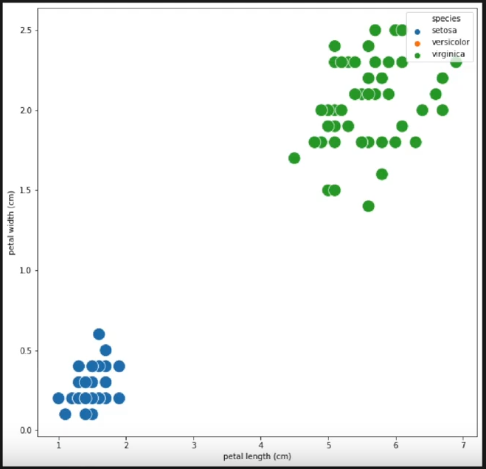

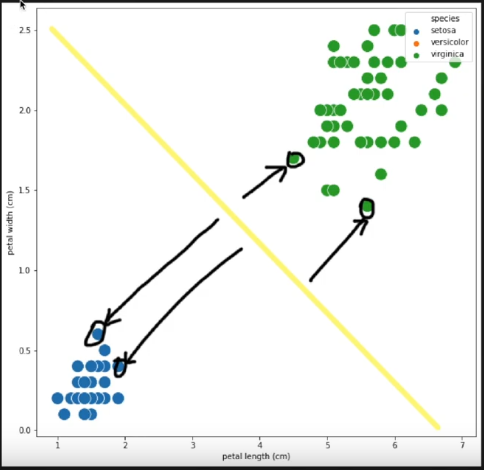

In [15]:
from sklearn import svm # importing SVM

In [16]:
y = dataSet[['Type']] # labels
x = principalDf # our data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state = 13 ) # train & test split
clf2 = svm.SVC() # defining the classifier, here we can choose if it's going to use a linear approche or polinomial, etc by kernel parameter
 # ex: svm.SVC(kernel='poly')
clf2.fit(x_train,y_train.values.ravel()) # training the classifier

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [17]:
clf2.predict(x_test) # testing it

array([2, 7, 7, 6, 2, 2, 1, 2, 2, 1, 1, 5, 5, 1, 7, 2, 1, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 7, 1, 5, 7, 1, 2, 1, 2, 1, 7, 2, 1, 1, 7, 2,
       7, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 7, 7, 2, 7, 2, 1, 2, 2, 1, 1])

In [18]:
#y_test

In [19]:
clf2.score(x_test, y_test) # checking it's accuracy

0.7076923076923077

Here we see that the accuracy was 69,23% 

##SVM vs KNN

if we take all the main groups (generated in the PCA), even changing the svm kernel we can't get close to the accuracy of KNN

# Regression


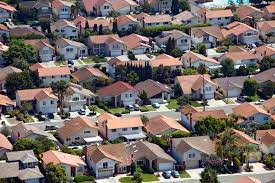

The data contains information from the 1990 California census. Check it out [here](https://www.kaggle.com/camnugent/california-housing-prices)

In [30]:
# useful imports
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

## EDA

In [21]:
# reading data with pandas
data = pd.read_csv('/content/housing.csv')
# let's take a look...
print(len(data))
print(data.head())

26071
   longitude latitude  ...  median_house_value  ocean_proximity
0    -122.23    37.88  ...            452600.0         NEAR BAY
1    -122.22    37.86  ...            358500.0         NEAR BAY
2    -122.24    37.85  ...            352100.0         NEAR BAY
3    -122.25    37.85  ...            341300.0         NEAR BAY
4    -122.25    37.85  ...            342200.0         NEAR BAY

[5 rows x 10 columns]


In [22]:
data = data.dropna() #we are not going to work with NA data
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']


now let's separate our features and labels in training the test

In [23]:
x = data.loc[:, features].values
y = data[['median_house_value']]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state = 0 )

## Linear Regression

It's a linear approach to modelling the relationship between a dependent variable and one or more independent variables.

In [24]:
scaler = StandardScaler() # scaler instance
x_train_scl = scaler.fit_transform(x_train) # scalling our features to normalize it
x_test_scl = scaler.transform(x_test)

model = LinearRegression(fit_intercept=True, normalize=False)

model.fit(x_train_scl, y_train)

pred = model.predict(x_test_scl)

In [25]:
np.sqrt(mean_squared_error(y_test, pred))
#plt.scatter(x,y)
#plt.plot(x,pred,color= 'red')
#plt.show()

70108.09752372719

## Naive Bayes

The Naive bayes method

It's a collection of classification algorithms based on [Bayes Theorem](https://en.wikipedia.org/wiki/Bayes%27_theorem).every feature being classified is independent of the value of any other feature. In a nutshell,  the algorithm allows us to predict a class, given a set of features using probability. 

In [26]:
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()

In [27]:
 naive.fit(x_train_scl,y_train.values.ravel()) # training, here we will generate the probability table

GaussianNB(priors=None, var_smoothing=1e-09)

In [28]:
prediction = naive.predict(x_test_scl)
prediction

array([169000., 247300., 102600., ..., 321900., 396000., 102600.])

In [29]:
np.sqrt(mean_squared_error(y_test, prediction))

98042.85226740385

## Naive Bayes vs Linear Regression

The mean squared error (MSE) tells you how close a regression line is to a set of points. The lower the MSE, the better the forecast so Linear Regression Algorithm performed better on this dataset